In [1]:
import numpy as np 
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# sin wave
N = 100  # samples
L = 1000 # length of each sample
T = 20   # width of waves


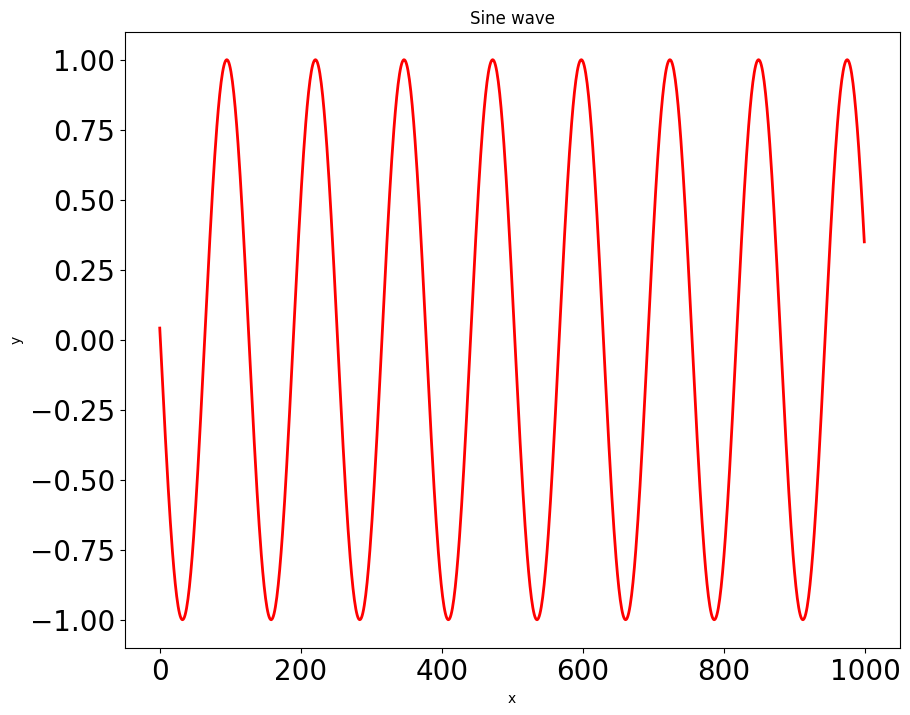

In [2]:
x = np.empty((N,L), np.float32)
x[:] = np.array(range(L)) + np.random.randint(-4*T, 4*T, N).reshape(N,1) # shift
y = np.sin(x/1.0/T).astype(np.float32)

plt.figure(figsize=(10,8))
plt.title("Sine wave")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(np.arange(x.shape[1]), y[0,:], 'r', linewidth=2.0)
# plt.show

In [3]:
class LSTMPredictor(nn.Module):
    def __init__(self, n_hidden=51):
        super(LSTMPredictor, self).__init__()
        self.n_hidden = n_hidden
        # lstm1, lstm2, linear
        self.lstm1 = nn.LSTMCell(1, self.n_hidden)
        self.lstm2 = nn.LSTMCell(self.n_hidden, self.n_hidden)
        self.linear = nn.Linear(self.n_hidden, 1)
    
    def forward(self, x, future=0):
        # N, 100
        outputs = []
        n_samples = x.size(0)
        
        h_t = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        c_t = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        
        h_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        c_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        
        for input_t in x.split(1, dim=1):
            # N, 1
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)
            
        for i in range(future):
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)
            
        outputs = torch.cat(outputs, dim =1)
        return outputs
        
        

Step  0
loss  0.50429767370224
loss  0.49542155861854553
loss  0.4714285731315613
loss  0.4557611048221588
loss  0.3947344124317169
loss  0.551067054271698
loss  0.25672295689582825
loss  0.1304747462272644
loss  0.8693643808364868
loss  0.022920390591025352
loss  0.021824482828378677
loss  0.021212641149759293
loss  0.020722201094031334
loss  0.019613245502114296
loss  0.017502211034297943
loss  0.013926348648965359
loss  0.0073555875569581985
loss  0.005810319911688566
loss  0.004512259736657143
loss  0.004089299589395523
Test loss  0.002759563736617565


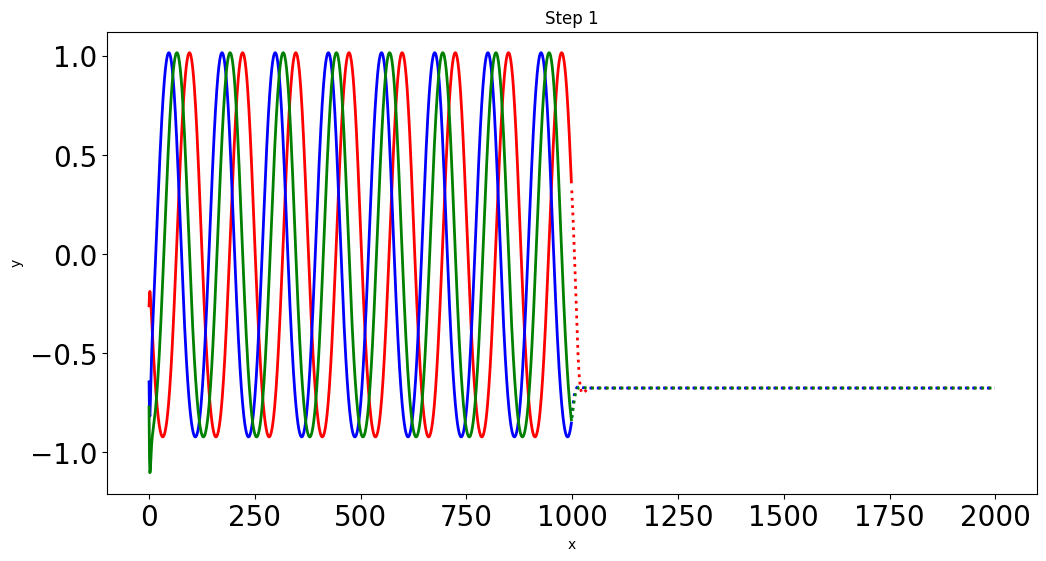

Step  1
loss  0.002903840271756053
loss  0.0022329087369143963
loss  0.002164207398891449
loss  0.0011410306906327605
loss  0.0008553991210646927
loss  0.0006675695185549557
loss  0.0005594670656137168
loss  0.0004485495446715504
loss  0.0004367327783256769
loss  0.0003923110489267856
loss  0.00038866509567014873
loss  0.0003870357177220285
loss  0.0003828401386272162
loss  0.00037409187643788755
loss  0.0003568791435100138
loss  0.00033006188459694386
loss  0.0002943706058431417
loss  0.00024993231636472046
loss  0.0002196909044869244
loss  0.0001970089360838756
Test loss  0.00025549877318553627


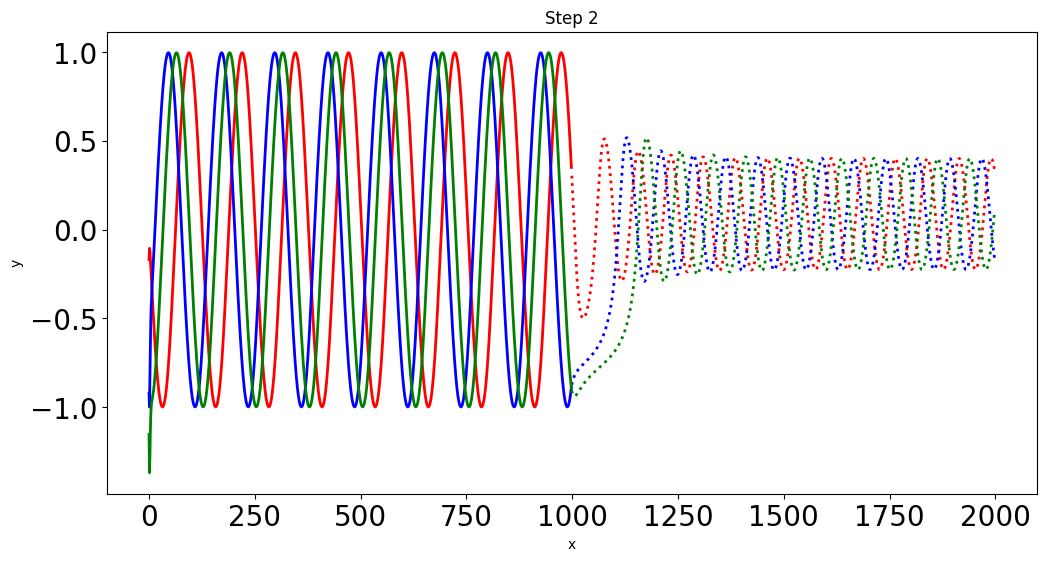

Step  2
loss  0.00018136190192308277
loss  0.00017602731531951576
loss  0.00017027083958964795
loss  0.00016862789925653487
loss  0.00016819770098663867
loss  0.00016792801034171134
loss  0.0001674378290772438
loss  0.00016646276344545186
loss  0.00016416600556112826
loss  0.00016002284246496856
loss  0.0001531552115920931
loss  0.00014362676301971078
loss  0.00013537626364268363
loss  0.00013211359328124672
loss  0.00013123371172696352
loss  0.0001310607185587287
loss  0.00013094146561343223
loss  0.00013079005293548107
loss  0.00013051928544882685
loss  0.00012994531425647438
Test loss  0.00013695347297471017


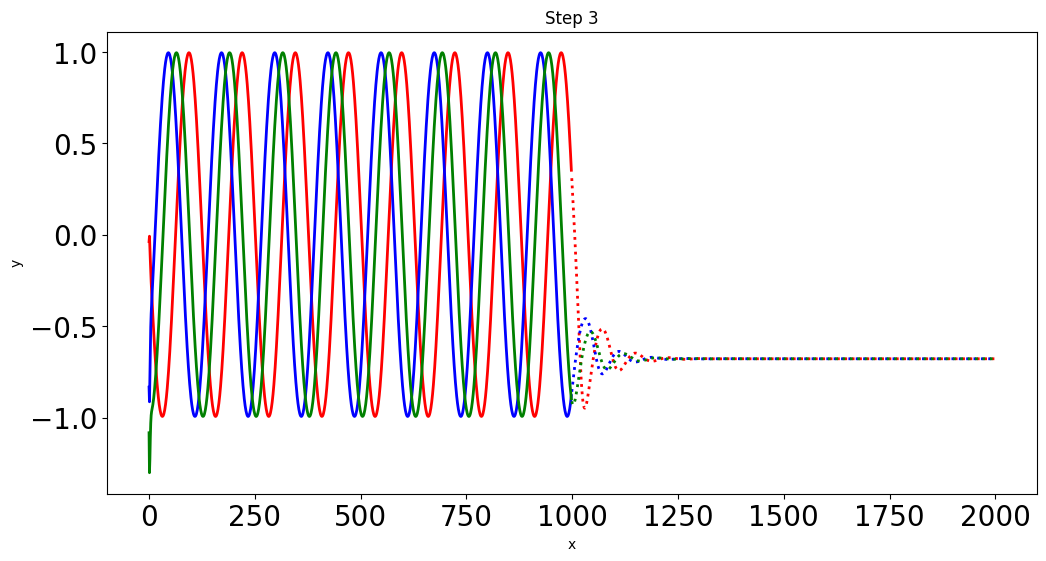

Step  3
loss  0.0001286496699322015
loss  0.0001255260140169412
loss  0.00012003069423371926
loss  0.00011341428762534633
loss  0.0001093909377232194
loss  0.00010249576735077426
loss  9.693111496744677e-05
loss  9.516828140476719e-05
loss  9.4472365162801e-05
loss  9.415796375833452e-05
loss  9.379398397868499e-05
loss  9.326409053755924e-05
loss  9.209744166582823e-05
loss  8.989415800897405e-05
loss  8.839867950882763e-05
loss  8.697550219949335e-05
loss  8.277099550468847e-05
loss  7.91613056208007e-05
loss  7.078645285218954e-05
loss  0.00011070877371821553
Test loss  0.0001003418437903747


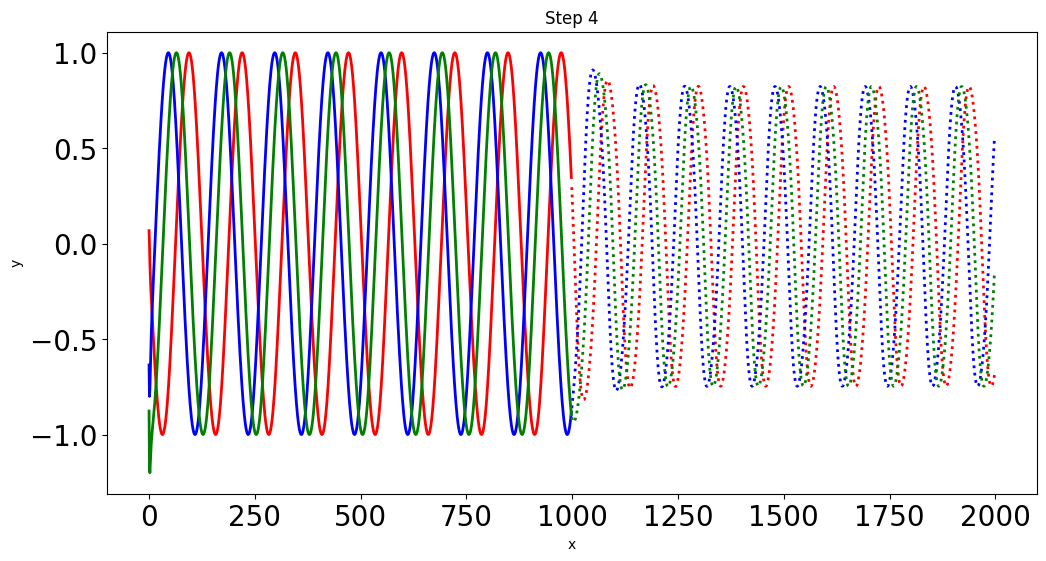

Step  4
loss  6.567555828951299e-05
loss  6.45484687993303e-05
loss  6.291920726653188e-05
loss  6.203116208780557e-05
loss  6.167354877106845e-05
loss  6.0978960391366854e-05
loss  5.993362356093712e-05
loss  5.917636735830456e-05
loss  5.811748997075483e-05
loss  5.65012451261282e-05
loss  5.206008063396439e-05
loss  5.029135718359612e-05
loss  4.720803917734884e-05
loss  4.637680103769526e-05
loss  4.639683538698591e-05
loss  4.601367254508659e-05
loss  4.5763728849124163e-05
loss  4.5468965254258364e-05
loss  4.50386360171251e-05
loss  4.4260981667321175e-05
Test loss  6.929666415089741e-05


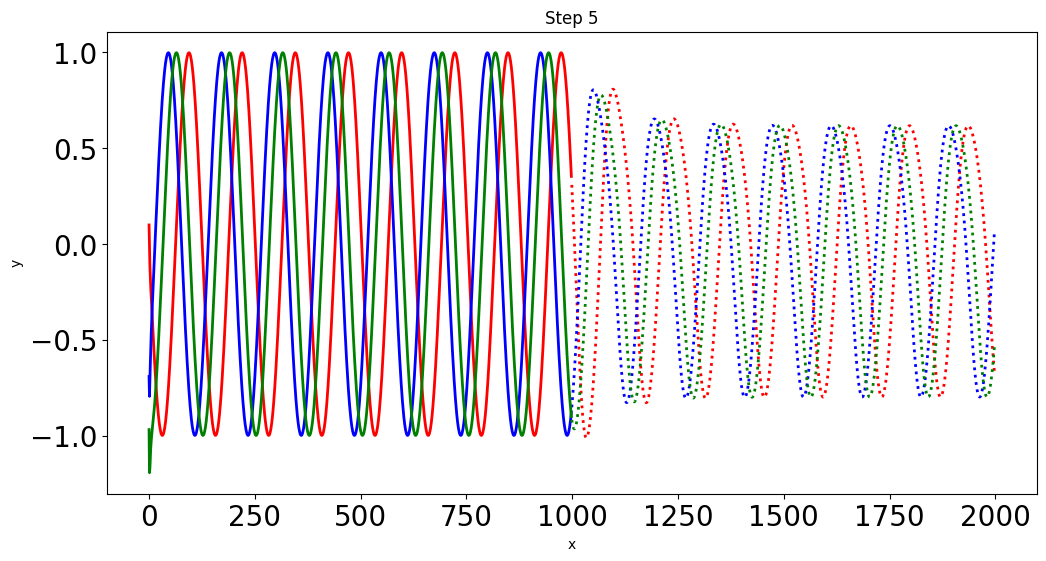

Step  5
loss  4.265047755325213e-05
loss  4.0754144720267504e-05
loss  3.9019807445583865e-05
loss  3.7072793929837644e-05
loss  3.633201777120121e-05
loss  3.569008185877465e-05
loss  3.517434015520848e-05
loss  3.4620614314917475e-05
loss  3.3842366974567994e-05
loss  3.2667445339029655e-05
loss  3.090795871685259e-05
loss  2.8769465643563308e-05
loss  2.7120835511595942e-05
loss  2.754443630692549e-05
loss  2.5251680199289694e-05
loss  2.3675307602388784e-05
loss  2.2281450583250262e-05
loss  2.0940706235705875e-05
loss  2.0358425899758004e-05
loss  1.966538911801763e-05
Test loss  3.313416527817026e-05


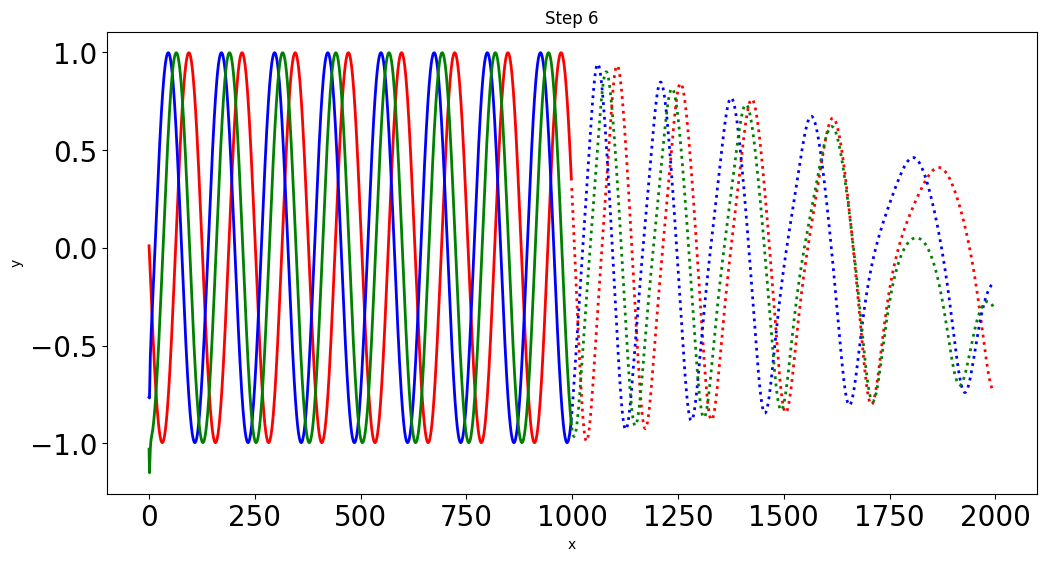

Step  6
loss  1.95027059817221e-05
loss  1.9349174181115814e-05
loss  1.904744749481324e-05
loss  1.8443148292135447e-05
loss  1.721670378174167e-05
loss  1.6492913346155547e-05
loss  1.5874409655225463e-05
loss  1.561221870360896e-05
loss  1.5248466297634877e-05
loss  1.4870201084704604e-05
loss  1.4412028576771263e-05
loss  1.4059634850127622e-05
loss  1.403166061209049e-05
loss  1.3868026144336909e-05
loss  1.3826023860019632e-05
loss  1.376616728521185e-05
loss  1.3704965567740146e-05
loss  1.3589548871095758e-05
loss  1.3429025784716941e-05
loss  1.319535840593744e-05
Test loss  2.4454411686747335e-05


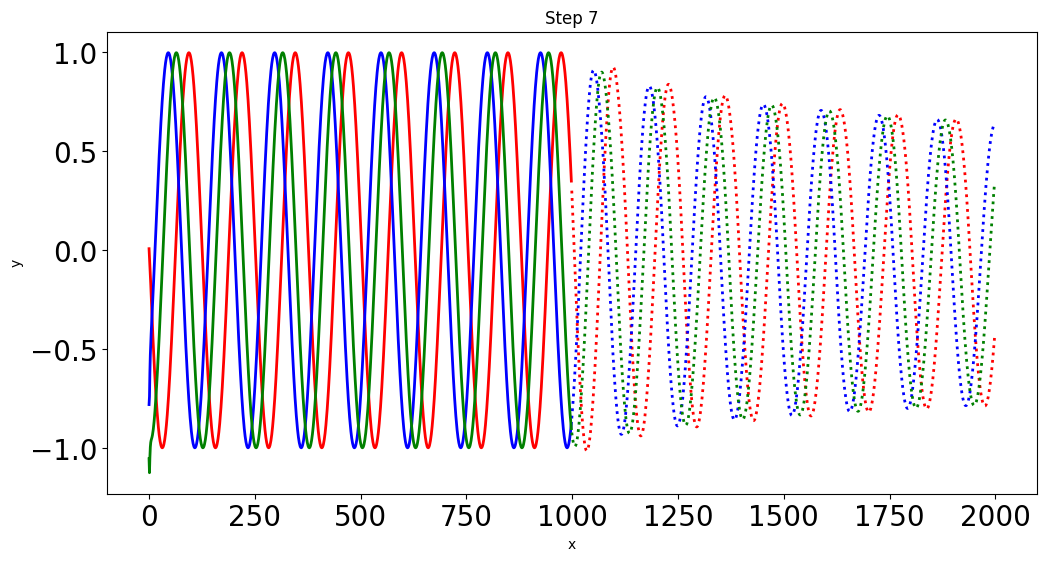

Step  7
loss  1.2758377124555409e-05
loss  1.202756175189279e-05
loss  1.1005387023033109e-05
loss  1.391434943798231e-05
loss  9.75106559053529e-06
loss  9.561122169543523e-06
loss  9.172618774755392e-06
loss  8.917812920117285e-06
loss  8.768816769588739e-06
loss  8.35760420159204e-06
loss  8.228333172155544e-06
loss  8.095460543700028e-06
loss  7.976314918778371e-06
loss  7.86658620199887e-06
loss  7.79962556407554e-06
loss  7.785263733239844e-06
loss  7.768082468828652e-06
loss  7.76503384258831e-06
loss  7.761421329632867e-06
loss  7.756211743981112e-06
Test loss  1.0237832611892372e-05


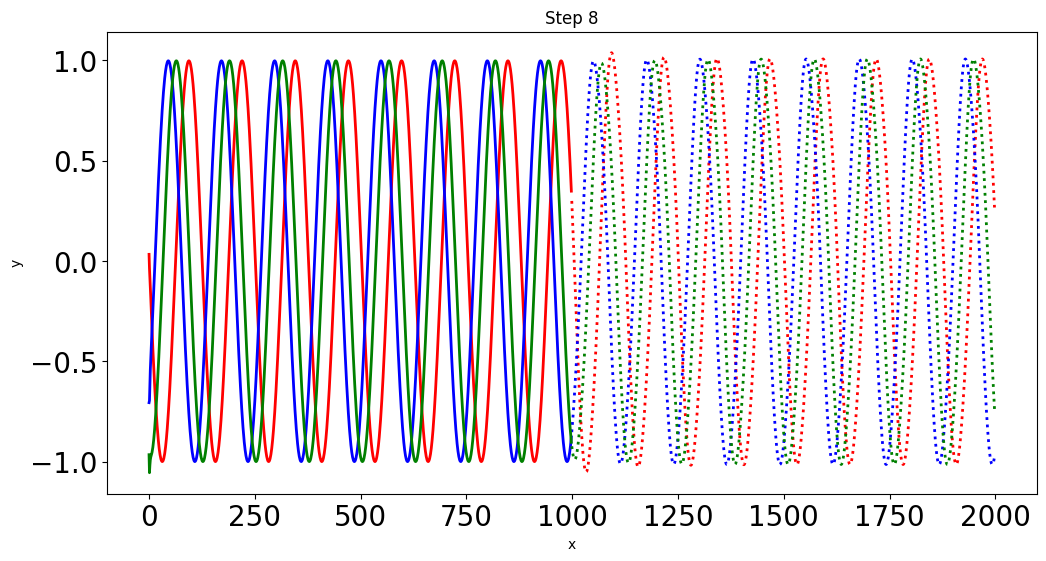

Step  8
loss  7.746345545456279e-06
loss  7.686169738008175e-06
loss  7.418976565531921e-06
loss  7.134980478440411e-06
loss  6.601340373890707e-06
loss  6.385676442732802e-06
loss  6.163919806567719e-06
loss  6.079792001401074e-06
loss  6.038217634340981e-06
loss  5.989362307445845e-06
loss  5.913234872423345e-06
loss  5.842893642693525e-06
loss  5.760958174505504e-06
loss  5.708699518436333e-06
loss  5.696791959053371e-06
loss  5.658027930621756e-06
loss  5.648999376717256e-06
loss  5.637270078295842e-06
loss  5.622593562293332e-06
loss  5.617017450276762e-06
Test loss  7.64378910389496e-06


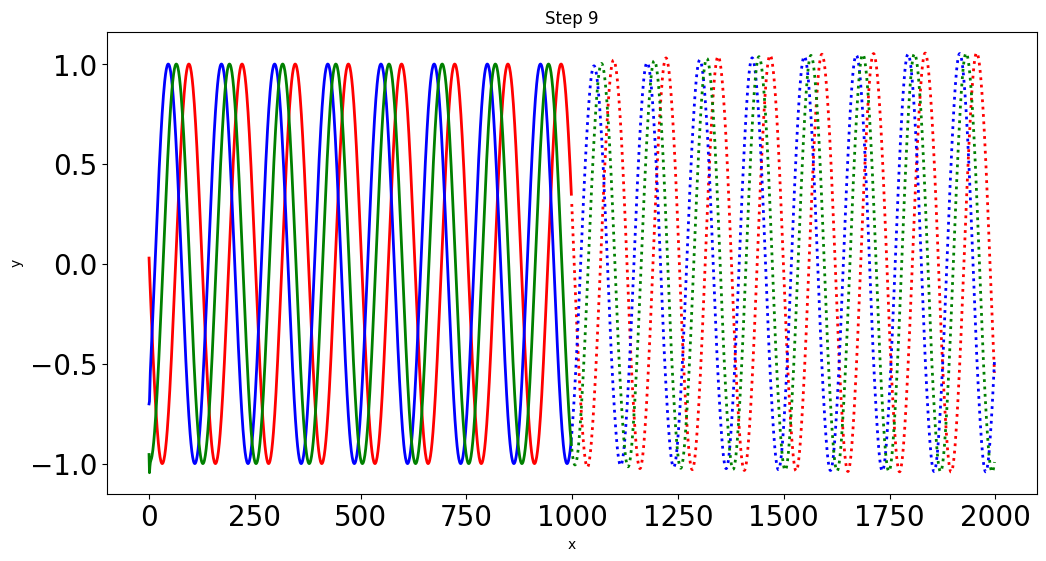

Step  9
loss  5.613999292108929e-06
loss  5.611612778011477e-06
loss  5.608877017948544e-06
loss  5.60604848942603e-06
loss  5.603756108030211e-06
loss  5.602188139164355e-06
loss  5.601188149739755e-06
Test loss  7.525817181885941e-06


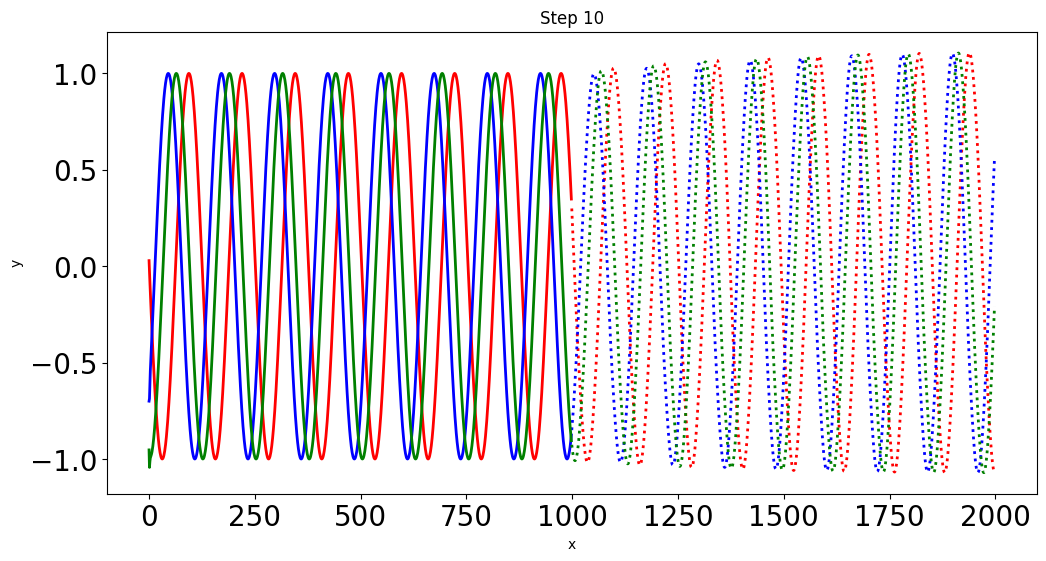

In [4]:
train_input  = torch.from_numpy(y[3:, :-1]) # 97 samples, 999 values each sample
train_target = torch.from_numpy(y[3:, 1:])  # 97, 999

test_input  = torch.from_numpy(y[:3, :-1])  # 3 samples, 999 values
test_target = torch.from_numpy(y[:3, 1:])   # 3 samples, 999 values

model = LSTMPredictor()
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.8)

n_steps = 10
for i in range(n_steps):
    print("Step ", i)
    
    def closure():
        optimizer.zero_grad()
        out = model(train_input)
        loss = criterion(out, train_target)
        print("loss ", loss.item())
        loss.backward()
        return loss
    
    optimizer.step(closure)
    
    with torch.no_grad():
        future = 1000
        pred = model(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target)
        print("Test loss ", loss.item())
        y = pred.detach().numpy()

    plt.figure(figsize=(12,6))
    plt.title(f"Step {i+1}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    n = train_input.shape[1] # 999
    
    def draw(y_i, color):
        plt.plot(np.arange(n), y_i[:n], color, linewidth=2.0)
        plt.plot(np.arange(n, n+future), y_i[n:], color + ":", linewidth=2.0)
        
    draw(y[0], 'r')
    draw(y[1], 'b')
    draw(y[2], 'g')
    
    plt.show()